# What is the Highest Grossing Genre?

# Import all of the relevant data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_movies = pd.read_csv('dataframe_id_tmdb_movies_gz.csv')

In [3]:
df_movies.head()
#print(df_movies.info())
#print(df_movies.shape)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
df_movies['genre_ids'][0] #need to clean this up #.apply to run a function on all rows of a dataframe #convert genre ids to a list of numbers
#then convert numbers into list of genres

'[12, 14, 10751]'

In [5]:
#turn string into a list #will slice this to remove the brackets, start at index 1 and stopping at -1 takes away first and last 
#characters
'[12, 14, 10751]'[1:-1].split(', ')

['12', '14', '10751']

In [6]:
#want to remove commas and spaces. just want list of numbers, not string elements #added .split to end of line once
#we have ints then function to map to genre name
#list comprehension to turn to int
[int(i) for i in ['12', '14', '10751']] #named this list_of_strings

[12, 14, 10751]

In [7]:
#define function to do all above steps in df to apply to every row def 
# function(row):
#def genre_ids(row):
    #list_of_strings = row['genre_ids'][1:-1].split(', ')
    #return [int(i) for i in list_of_strings]
#this function is what caused the error below

In [8]:
#apply here
#reassign all values in column to the correct format 
#this is how we change values in df 

In [9]:
#now we have to account for row 517 and put that in function by an if in list
# comprehension
def genre_ids(row):
    list_of_strings = row['genre_ids'][1:-1].split(', ')
    return [int(i) if i != "" else None for i in list_of_strings]

In [10]:
df_movies['genre_ids'] = df_movies.apply(lambda row: genre_ids(row), axis = 1) 


In [11]:
df_movies['genre_ids'].head()

0        [12, 14, 10751]
1    [14, 12, 16, 10751]
2          [12, 28, 878]
3        [16, 35, 10751]
4          [28, 878, 12]
Name: genre_ids, dtype: object

In [12]:
df_movies['genre_ids'] #calling this column

0            [12, 14, 10751]
1        [14, 12, 16, 10751]
2              [12, 28, 878]
3            [16, 35, 10751]
4              [28, 878, 12]
                ...         
26512               [27, 18]
26513               [18, 53]
26514           [14, 28, 12]
26515        [10751, 12, 28]
26516               [53, 27]
Name: genre_ids, Length: 26517, dtype: object

In [13]:
df_movies['genre_ids'][0]

[12, 14, 10751]

In [14]:
type(df_movies['genre_ids'][0])

list

In [15]:
#create a function to map (json thing) and then do .apply
genremap = [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, 
            {"id": 16, "name": "Animation"}, {"id": 35, "name": "Comedy"}, 
            {"id": 80, "name": "Crime"}, {"id": 99, "name": "Documentary"}, 
            {"id": 18, "name": "Drama"}, {"id": 10751, "name": "Family"}, 
            {"id": 14, "name": "Fantasy"}, {"id": 36, "name": "History"}, 
            {"id": 27, "name": "Horror"}, {"id": 10402, "name": "Music"}, 
            {"id": 9648, "name": "Mystery"}, {"id": 10749, "name": "Romance"}, 
            {"id": 878, "name": "Science Fiction"}, 
            {"id": 10770, "name": "TV Movie"}, {"id": 53, "name": "Thriller"}, 
            {"id": 10752, "name": "War"}, {"id": 37, "name": "Western"}]

In [16]:
def genre_names(row):
    ints = row['genre_ids'] # getting the list of integers
    genre_dicts = list(filter(lambda x: x['id'] in ints, genremap)) # filtering out that list for the relevant genres
    return [g['name'] for g in genre_dicts] # cleaning out

In [17]:
#need to map or apply into dataframe 
df_movies['genre_names'] = df_movies.apply(lambda row : genre_names(row),
                                              axis=1)

In [18]:
df_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[Adventure, Family, Fantasy]"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[Adventure, Animation, Family, Fantasy]"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[Action, Adventure, Science Fiction]"
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[Animation, Comedy, Family]"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[Action, Adventure, Science Fiction]"
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,"[Drama, Horror]"
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,"[Drama, Thriller]"
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,"[Action, Adventure, Fantasy]"
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,"[Action, Adventure, Family]"


In [19]:
df_movies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'genre_names'],
      dtype='object')

In [20]:
unique_genres = [x['name'] for x in genremap]

In [21]:
genre_df = pd.DataFrame(columns = unique_genres)
genre_df = pd.concat([df_movies, genre_df])
genre_df

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,...,genre_ids,genre_names,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[12, 14, 10751]","[Adventure, Family, Fantasy]",12444.0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[14, 12, 16, 10751]","[Adventure, Animation, Family, Fantasy]",10191.0,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[12, 28, 878]","[Action, Adventure, Science Fiction]",10138.0,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[16, 35, 10751]","[Animation, Comedy, Family]",862.0,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[28, 878, 12]","[Action, Adventure, Science Fiction]",27205.0,en,Inception,27.920,2010-07-16,Inception,8.3,22186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[27, 18]","[Drama, Horror]",488143.0,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1.0
26513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[18, 53]","[Drama, Thriller]",485975.0,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1.0
26514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[14, 28, 12]","[Action, Adventure, Fantasy]",381231.0,en,The Last One,0.600,2018-10-01,The Last One,0.0,1.0
26515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[10751, 12, 28]","[Action, Adventure, Family]",366854.0,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1.0


In [22]:
genre_df.columns

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'Unnamed: 0',
       'War', 'Western', 'genre_ids', 'genre_names', 'id', 'original_language',
       'original_title', 'popularity', 'release_date', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [23]:
print(unique_genres)

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


In [24]:
def populate_genres(genre, row):
    genres = row['genre_names']
    if genre in genres:
        return 1
    else:
        return 0

In [25]:
df_movies['Action'] = df_movies.apply(lambda row: populate_genres('Action',
                                                                  row), 
                                      axis = 1)

In [26]:
for g in unique_genres:
    df_movies[g] = df_movies.apply(lambda row: populate_genres(g, row), 
                                   axis=1)

In [27]:
df_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,0,0,0,0,0,0,0,0,0,0
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,0,0,0,0,0,0,0,0,0,0
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,0,0,0,0,0,1,0,0,0,0
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,0,0,0,0,0,0,0,0,0,0
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,0,0,0,0,0,1,0,0,0,0


In [28]:
genres = df_movies[['title', 'Action', 'Adventure', 'Animation',
                    'Comedy', 'Crime', 'Documentary', 'Drama',
                    'Family', 'Fantasy', 'History', 'Horror', 'Music',
                    'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
                    'Thriller', 'War', 'Western']]

In [29]:
genres.shape

(26517, 20)

In [30]:
profit = pd.read_csv('joined_gross_budget_cleaned.csv')

In [31]:
gross_genre = profit.set_index('title').join(genres.set_index('title'), 
                                             how= 'inner')
gross_genre.head()


,Unnamed: 0,month,year,production_budget,worldwide_gross,domestic_gross,net_prof,net_margin_%,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,,
10 Cloverfield Lane,2,3,2016,5000000.0,108286422.0,72091499.5,103286422.0,95.38,0,0,...,0,0,0,0,0,1,0,1,0,0
12 Strong,12,1,2018,35000000.0,71118378.0,45809856.5,36118378.0,50.79,1,0,...,1,0,0,0,0,0,0,0,1,0
12 Years a Slave,13,10,2013,20000000.0,181025343.0,56685996.5,161025343.0,88.95,0,0,...,1,0,0,0,0,0,0,0,0,0
127 Hours,14,11,2010,18000000.0,60217171.0,18317615.0,42217171.0,70.11,0,1,...,0,0,0,0,0,0,0,1,0,0
13 Hours: The Secret Soldiers of Benghazi,16,1,2016,50000000.0,69411370.0,52876609.5,19411370.0,27.97,1,0,...,1,0,0,0,0,0,0,1,1,0


In [32]:
unique_genres

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

In [33]:
profit.columns

Index(['Unnamed: 0', 'title', 'month', 'year', 'production_budget',
       'worldwide_gross', 'domestic_gross', 'net_prof', 'net_margin_%'],
      dtype='object')

In [34]:
mean_profit_df = pd.DataFrame()
for genres in unique_genres:
    filtered_df = gross_genre[gross_genre[genres] == 1]
    grouped_genre = filtered_df.groupby(genres).agg({"net_prof": "mean"})
    mean_profit_df.at[genres, 'net_prof'] = grouped_genre['net_prof'].iloc[0]
grouped_genre.head()
mean_profit_df


,net_prof
Action,2.275514e+08
Adventure,2.995158e+08
Animation,2.972483e+08
Comedy,1.296039e+08
Crime,1.057869e+08
Documentary,6.932639e+07
Drama,8.113776e+07
Family,2.464338e+08
Fantasy,2.719942e+08
History,6.570987e+07


In [35]:
mean_profit_df.axes
mean_profit_df["net_prof"] = mean_profit_df["net_prof"].apply(lambda x: int(x))
mean_profit_df.head()
mean_profit_df_sorted = mean_profit_df.sort_values(by="net_prof", ascending=False)
mean_profit_df_sorted.head()

,net_prof
Adventure,299515807
Animation,297248302
Fantasy,271994226
Family,246433772
Science Fiction,240243628


# Visualization

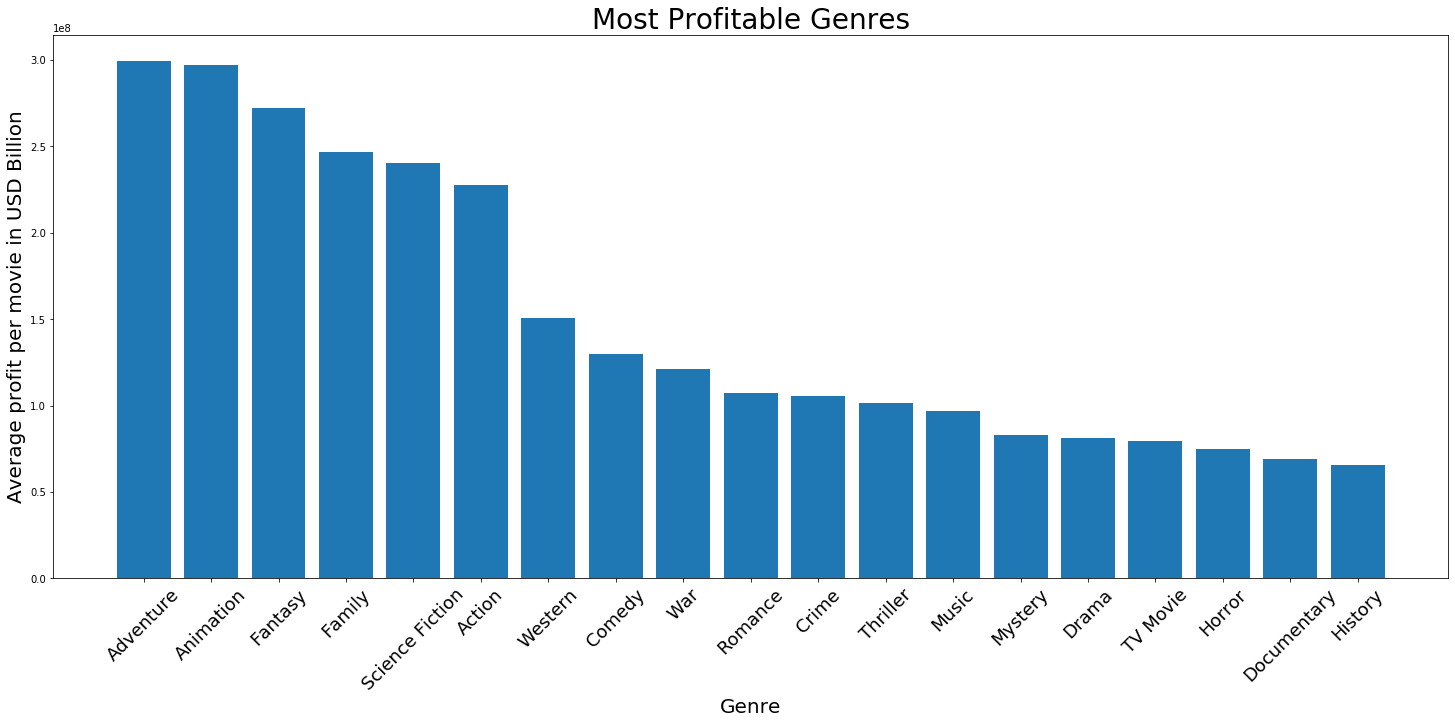

In [41]:
#Plotting
#import matplotlib.pyplot as plt; plt.rcdefaults()
#import numpy as np
#import matplotlib.pyplot as plt


y_pos = np.arange(len(mean_profit_df_sorted.index))
performance = mean_profit_df_sorted["net_prof"]
plt.figure(figsize=(25,10))
plt.bar(y_pos, performance, align='center', alpha=1.0)
plt.xticks(y_pos, mean_profit_df_sorted.index, fontsize = 18)
plt.ylabel('Average profit per movie in USD Billion', fontsize=20)
plt.title('Most Profitable Genres', fontsize=28)
plt.xlabel('Genre', fontsize=20)
degrees = 45
plt.xticks(rotation=degrees)


plt.show()

# Conclusions

We see that the mean profit is the highest for films that are of genres adventure, animation, and fantasy. Documentary and history are genres with the lowest profits. This makes sense given that the three most profitable genres have a wider audience to appeal to and also typically have higher budgets. Documentary and history genres are appealing to a more niche audience.

# Recommendations

As can be seen from the dataframe and the table some genres are more profitable than others. Since a movie often is often categorized under several genres, it pays to consider making a movie that can be categorized under some profitable genres in addition to its other genres, in order to increase the taget audience. 